In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp( -z ))

In [4]:
def propagate(x, y, w, b):
    m = y.size
    z = np.dot(w.T, x) + b
    a = sigmoid(z)
    cost = np.sum(-y*np.log(a)-((1-y)*np.log(1-a))) / m
    dw = np.dot((a - y), x.T) / m
    db = np.sum(a-y) / m
    grad = {'dw' : dw, 'db' : db}
    return cost, grad

In [5]:
def back_prop(x, y, w, b, lr=0.01, iters=2500):
    cst = []
    for i in range(iters):
        cost, params = propagate(x, y, w, b)
        cst.append(cost)
        dw = params['dw'].T
        db = params['db'].T
        w = w - lr*dw
        b = b - lr*db
        if i%100==0 or i==iters-1:
            print('Cost at %ith iteration : %f'%(i, cost))
    grads = {'w' : w, 'b' : b}
    return cst, grads

In [6]:
data = pd.read_csv('Social_Network_Ads.csv')
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
from sklearn.preprocessing import StandardScaler
x = data.iloc[:, [2, 3]].values
y = data.iloc[:, -1].values.reshape((1, -1))
sc = StandardScaler()
x = sc.fit_transform(x).T

In [8]:
x.shape, y.shape

((2, 400), (1, 400))

In [9]:
w = np.random.random((x.shape[0], 1))*0.01
b = 0.5326*0.01

In [10]:
w, b

(array([[0.00889109],
        [0.00287136]]),
 0.005326)

In [11]:
costs, grads = back_prop(x, y, w, b, lr = 0.1, iters=5000)

Cost at 0th iteration : 0.690771
Cost at 100th iteration : 0.386042
Cost at 200th iteration : 0.359921
Cost at 300th iteration : 0.352269
Cost at 400th iteration : 0.349218
Cost at 500th iteration : 0.347818
Cost at 600th iteration : 0.347123
Cost at 700th iteration : 0.346760
Cost at 800th iteration : 0.346564
Cost at 900th iteration : 0.346456
Cost at 1000th iteration : 0.346395
Cost at 1100th iteration : 0.346361
Cost at 1200th iteration : 0.346341
Cost at 1300th iteration : 0.346330
Cost at 1400th iteration : 0.346323
Cost at 1500th iteration : 0.346320
Cost at 1600th iteration : 0.346317
Cost at 1700th iteration : 0.346316
Cost at 1800th iteration : 0.346315
Cost at 1900th iteration : 0.346315
Cost at 2000th iteration : 0.346315
Cost at 2100th iteration : 0.346314
Cost at 2200th iteration : 0.346314
Cost at 2300th iteration : 0.346314
Cost at 2400th iteration : 0.346314
Cost at 2500th iteration : 0.346314
Cost at 2600th iteration : 0.346314
Cost at 2700th iteration : 0.346314
Cost

In [12]:
grads

{'w': array([[2.44457801],
        [1.22258102]]),
 'b': -1.1381213779308867}

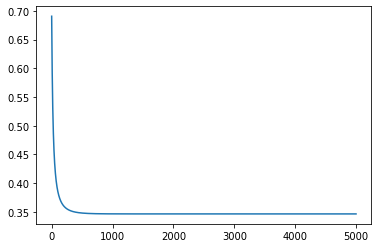

In [13]:
plt.plot(costs) # Gradient Descent 

In [14]:
a = sigmoid(np.dot(grads['w'].T, x)+grads['b'])

In [15]:
preds = np.where(a>=.5, 1, 0)

In [16]:
preds

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
        1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1,
        1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 0, 0, 

In [17]:
y

array([[0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
        1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,
        0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
        1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0,
        1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 

In [18]:
v = 1*(y==preds)

In [19]:
(np.sum(v)/v.size)*100 # Accuracy

84.5